In [1]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer 

1. Импорт датасета

In [2]:
trainingData = fetch_20newsgroups(subset = 'train')
testData = fetch_20newsgroups(subset = 'test')

2.	Познакомимся с описанием и структурой датасета. Описание можно найти в документации.

3. Вывод информации о размере датасета

In [3]:
print(f"Размер filenames: {trainingData.filenames.shape}")
print(f"Размер target: {trainingData.target.shape}")

Размер filenames: (11314,)
Размер target: (11314,)


4.	Выведем несколько точек датасета (сами текстовые фрагменты и значение целевой переменной);

In [10]:
trainingDataTargets = trainingData.target[:10]
print(f"Пример данных target:\n{'-'*10}\n{trainingDataTargets}\n{'-'*10}")
print(f"Пример данных data: \n{'-'*10}\n")
for i in trainingDataTargets[:3]:
  print(f"Target:\n{i}\nData:\n{trainingData.data[i][:200]}...\n")
  print(f"\n{'-' * 10}\n")

Пример данных target:
----------
[ 7  4  4  1 14 16 13  3  2  4]
----------
Пример данных data: 
----------

Target:
7
Data:
From: bgrubb@dante.nmsu.edu (GRUBB)
Subject: Re: IDE vs SCSI
Organization: New Mexico State University, Las Cruces, NM
Lines: 44
Distribution: world
NNTP-Posting-Host: dante.nmsu.edu

DXB132@psuvm.psu...


----------

Target:
4
Data:
From: jcm@head-cfa.harvard.edu (Jonathan McDowell)
Subject: Re: Shuttle Launch Question
Organization: Smithsonian Astrophysical Observatory, Cambridge, MA,  USA
Distribution: sci
Lines: 23

From artic...


----------

Target:
4
Data:
From: jcm@head-cfa.harvard.edu (Jonathan McDowell)
Subject: Re: Shuttle Launch Question
Organization: Smithsonian Astrophysical Observatory, Cambridge, MA,  USA
Distribution: sci
Lines: 23

From artic...


----------



5.	Разделим эти данные на тестовую и обучающую выборки

In [11]:
#Импорт библиотек
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [13]:
vectorizer = CountVectorizer()
vectors_training = vectorizer.fit_transform(trainingData.data)
vectors_test =  vectorizer.transform(testData.data)

6.	Построим модель наивного байесовского для классификации текстов;

In [17]:
# создаём модель наивного байесовского для классификации текстов
model = MultinomialNB(alpha = .01)

#Обучаем модель
model.fit(vectors_training, trainingData.target)

MultinomialNB(alpha=0.01)

7.	Оцените качество модели на тестовой выборке с помощью следующих метрик:

a.	достоверность предсказания (accuracy);

b.	точность (precision);

c.	полнота (recall);

In [18]:
predicted = model.predict(vectors_test)
print("F1 macro-average : {0}".format(metrics.f1_score(testData.target, predicted, average='macro')))
print("F1 micro-average: {0}".format(metrics.f1_score(testData.target, predicted, average='micro')))
print(metrics.classification_report(testData.target, predicted))

F1 macro-average : 0.7852092132952866
F1 micro-average: 0.8039033457249071
              precision    recall  f1-score   support

           0       0.80      0.83      0.82       319
           1       0.57      0.78      0.66       389
           2       0.75      0.04      0.07       394
           3       0.55      0.78      0.64       392
           4       0.74      0.83      0.78       385
           5       0.80      0.73      0.76       395
           6       0.79      0.85      0.82       390
           7       0.86      0.90      0.88       396
           8       0.91      0.96      0.94       398
           9       0.95      0.93      0.94       397
          10       0.96      0.96      0.96       399
          11       0.88      0.93      0.91       396
          12       0.77      0.76      0.76       393
          13       0.88      0.83      0.86       396
          14       0.87      0.89      0.88       394
          15       0.89      0.92      0.91       398
      

Ответ:

Достоверность предсказания (accuracy) 0.79

Точность (precision) 0.81

Полнота recall 0.80

8.	Построим кривую обучения - график зависимости тестовой и обучающей эффективности от размера обучающей выборки.

In [19]:
#Матрица всех данных 
matrix = metrics.confusion_matrix(testData.target, predicted)

Text(0.5, 177.0, 'Предсказанные значения')

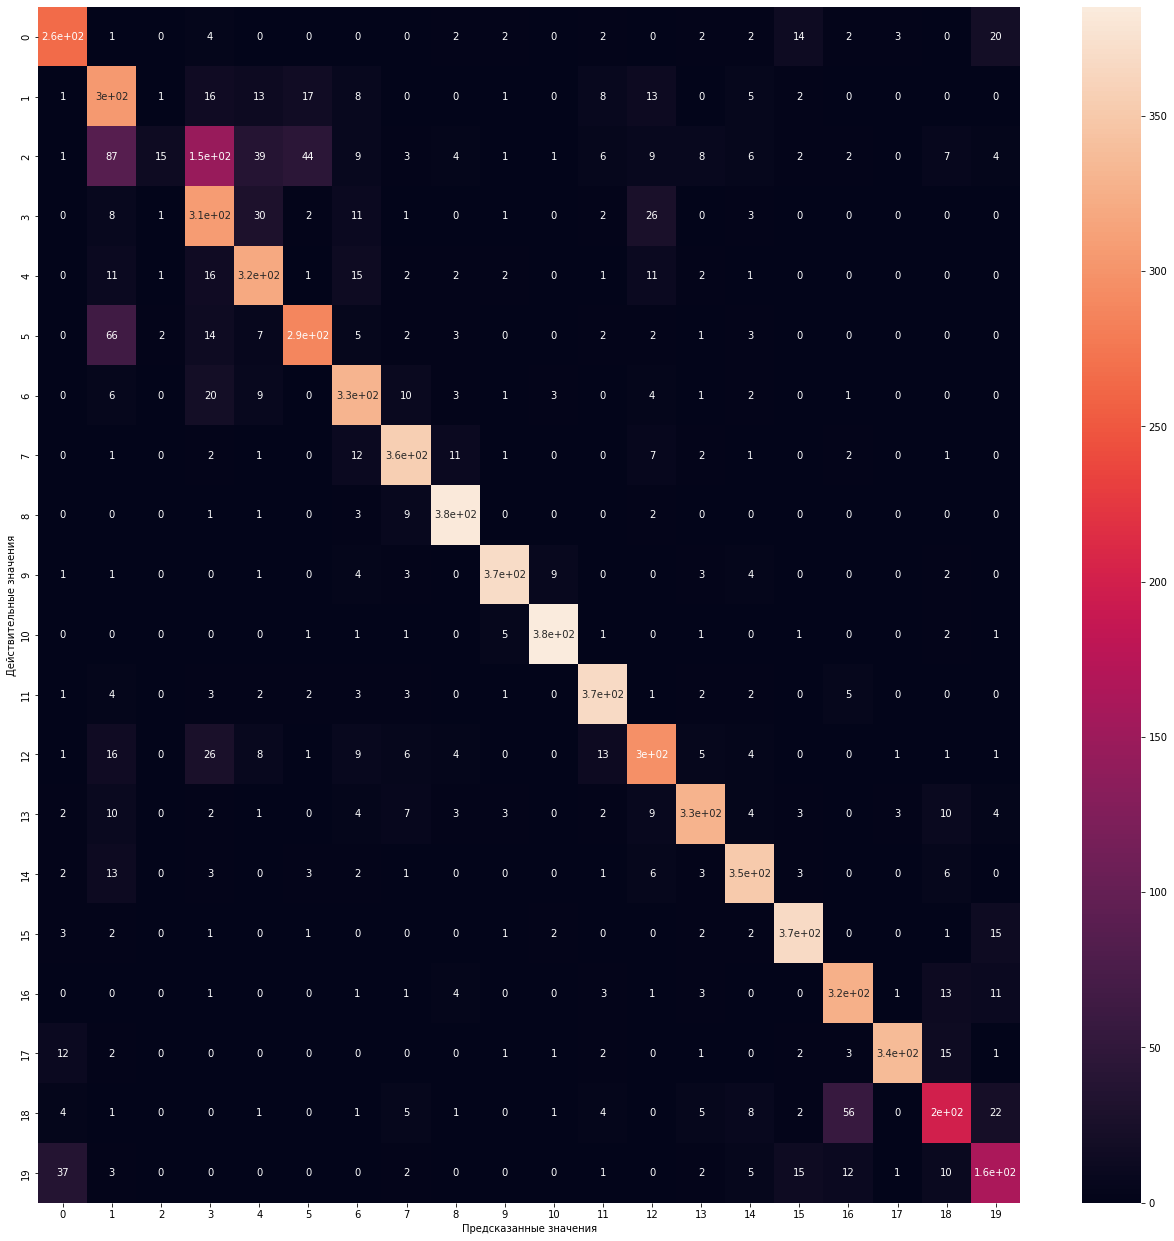

In [20]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(22, 22))
sns.heatmap(pd.DataFrame(matrix), annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')

График зависимости тестовой и обучающей эффективности от размера обучающей выборки.

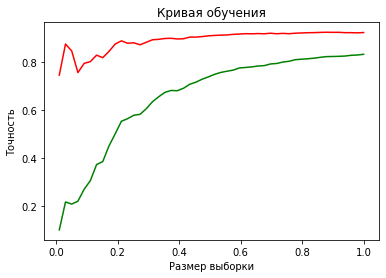

In [21]:
import numpy as np
from sklearn.model_selection import learning_curve

# Генерация кривой обучения
size_grid = np.linspace(0.01, 1.0, 50)

train_size,train_scores,validation_scores = learning_curve(MultinomialNB(),vectors_training, trainingData.target,train_sizes = size_grid, cv = 5)

# Визуализация кривой обучения
plt.figure()
plt.plot(size_grid,np.average(train_scores, axis = 1), color = 'red')
plt.plot(size_grid, np.average(validation_scores, axis = 1), color = 'green')
plt.title('Кривая обучения')
plt.xlabel('Размер выборки')
plt.ylabel('Точность')
plt.show()

9.	Сделайте вывод о применимости модели.

Модель можно применять на исходных данных т.к. точность классификации остатвляет около 80%